# scTOP Vignette 2- Constructing Reference Bases

In [3]:
# Load libraries
import sctop as top
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
pio.renderers.default = 'notebook'
%load_ext autoreload
%autoreload 1
%aimport SimilarityHelper
%aimport TopObject
%aimport CriticalityHelper

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load new dataset and set as basis

In [5]:
kathiriyaObj = TopObject.TopObject("Kathiriya", manualInit=False)
kathiriyaObj.setBasis() # This doesn't stop you from using it as a source still, just fills in the basis attribute of the object

Setting basis...


100%|██████████| 6/6 [00:08<00:00,  1.42s/it]


Basis set!


celltypes,dBasal,eClub,cABI2,aAEC2s,bABI1,fCiliated
gene,,,,,,
FAM138A,-0.966328,-0.888539,-0.808564,-0.851814,-0.752612,-0.687755
AL627309.1,-0.197881,-0.283495,-0.808564,-0.851814,-0.752612,-0.687755
AL627309.3,-0.966328,-0.888539,-0.808564,-0.851814,-0.752612,-0.687755
AL627309.2,-0.966328,-0.888539,-0.808564,-0.851814,-0.752612,-0.687755
OR4F29,-0.966328,-0.888539,-0.808564,-0.851814,-0.752612,-0.687755
...,...,...,...,...,...,...
TTTY4B,-0.966328,-0.888539,-0.808564,-0.851814,-0.752612,-0.687755
BPY2B,-0.966328,-0.888539,-0.808564,-0.851814,-0.752612,-0.687755
DAZ4,-0.966328,-0.888539,-0.808564,-0.851814,-0.752612,-0.687755


## Test basis columns

In [35]:
# This test may take some time, but you should end up with an overall acuracy and be able to determine which annotations had performance problems. A good basis should have top1 accuracy > 80%
kathiriyaObj.testBasis()

Setting basis...


100%|██████████| 6/6 [00:00<00:00,  6.61it/s]


Basis set!
Processing test data...


  0%|          | 0/10 [00:00<?, ?it/s]

Scoring projection...


 10%|█         | 1/10 [00:09<01:25,  9.50s/it]

Scoring projection...


 20%|██        | 2/10 [00:18<01:15,  9.43s/it]

Scoring projection...


 30%|███       | 3/10 [00:28<01:05,  9.41s/it]

Scoring projection...


 40%|████      | 4/10 [00:37<00:56,  9.41s/it]

Scoring projection...


 50%|█████     | 5/10 [00:47<00:47,  9.47s/it]

Scoring projection...


 60%|██████    | 6/10 [00:56<00:37,  9.43s/it]

Scoring projection...


 70%|███████   | 7/10 [01:05<00:28,  9.36s/it]

Scoring projection...


 80%|████████  | 8/10 [01:14<00:18,  9.30s/it]

Scoring projection...


 90%|█████████ | 9/10 [01:24<00:09,  9.32s/it]

Scoring projection...


100%|██████████| 10/10 [01:33<00:00,  9.35s/it]

top1: 0.8464869012386277
top3: 0.9932587964485367
unspecified: 0.09613065877452592


({'top1': 15445, 'top3': 18123, 'unspecified': 1754},
 {'dBasal': 593,
  'cABI2': 245,
  'eClub': 417,
  'fCiliated': 12,
  'aAEC2s': 236,
  'bABI1': 33},
 {'dBasal': 188,
  'bABI1': 34,
  'aAEC2s': 33,
  'fCiliated': 1,
  'cABI2': 25,
  'eClub': 7})

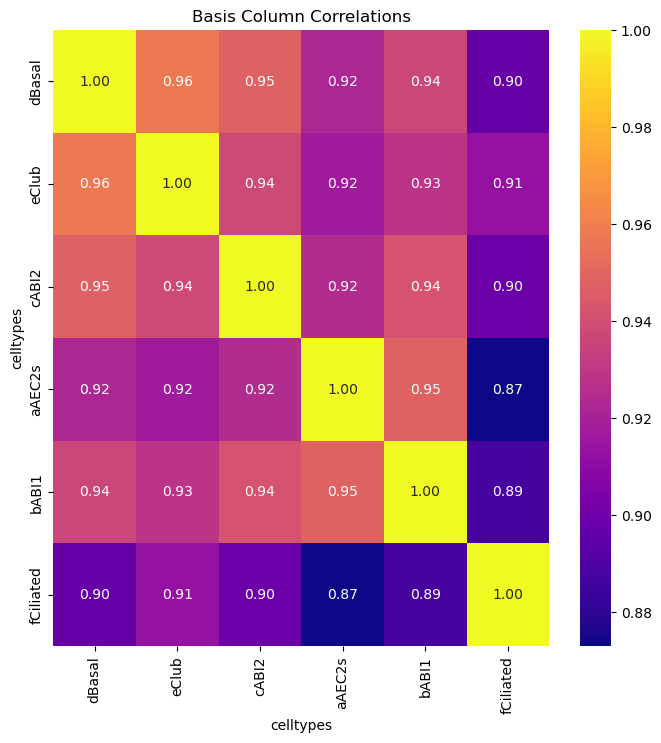

In [41]:
# You can also generate a correlation matrix to test if there are any basis columns that are overly similar. Values are very high so it's tricky to use, however
# kathiriyaObj.getBasisCorrelations()
plt.subplots(1, 1, figsize=(8,8))
SimilarityHelper.plotCorrelationMatrix(kathiriyaObj.corr, textSize=10)
# plt.savefig('/Your/Path/Here.png')
plt.savefig('../PendingResults/KathiriyaCorrMatrix.png')
plt.show()

## Load another dataset to test against this new basis

In [39]:
habermannObj = TopObject.TopObject("Habermann", manualInit=False) # Load object
habermannObj.projectOntoBasis(kathiriyaObj.basis, "Kathiriya") # Construct projections

Setting AnnData object...
Setting metadata...
Setting df...
Processing scTOP data...
Done!
Projecting onto basis...
Finished projecting!


index,F00431_AGAGCTTGTAGAGGAA,F01380_GATCTAGTCTTGCCGT,F01391_AGTCTTTAGGTTACCT,F01391_ATCCACCAGGAGTCTG,F01391_CTCGTCATCATCTGCC,F01391_CTGATAGCAGACGCCT,F01391_CTGGTCTCACAGAGGT,F01391_GAACATCAGCTGATAA,F01391_TACTCATCATAGAAAC,F01391_TCAGGATTCGGTGTTA,...,ILD62-2_TGACTTTCATGGTCAT,ILD62-2_TGAGAGGCATCGATGT,ILD62-2_TGATTTCGTCCGTCAG,ILD62-2_TGCGCAGCAAGGTTTC,ILD62-2_TGTGGTACAGCGTAAG,ILD62-2_TTCTACACAACACCCG,ILD62-2_TTGACTTAGTATCTCG,ILD62-2_TTGGCAAAGCGTAATA,ILD62-2_TTGGCAATCGTAGATC,ILD62-2_TTTGCGCTCCTCCTAG
celltypes,,,,,,,,,,,,,,,,,,,,,
dBasal,-0.237071,-0.180742,-0.185551,-0.232380,-0.188758,-0.286446,-0.199676,-0.247221,-0.237630,-0.211969,...,-0.066435,-0.079964,-0.067342,-0.088930,-0.051388,-0.075700,-0.080848,-0.069734,-0.108227,-0.095776
eClub,0.242746,0.276592,0.351836,0.361419,0.305269,0.489555,0.371951,0.354539,0.347829,0.302053,...,-0.004316,0.005063,0.002683,0.001129,0.010179,-0.012268,-0.014473,0.008317,-0.001033,0.004639
cABI2,0.007904,0.032267,-0.006623,0.011588,0.008659,-0.045377,0.000626,0.023173,-0.006406,0.022699,...,0.002093,0.007826,-0.004252,0.019583,0.000416,-0.002056,0.016306,-0.006214,0.021224,0.018022
aAEC2s,0.162988,-0.002768,0.066284,0.063703,0.043081,0.071598,0.058593,0.061970,0.067748,0.076147,...,0.106867,0.091897,0.113869,0.127052,0.086057,0.141665,0.137177,0.121727,0.165951,0.130914
bABI1,0.141976,0.216950,0.245250,0.192381,0.192534,0.246606,0.173130,0.211797,0.179084,0.168378,...,0.155070,0.145424,0.217469,0.149476,0.135364,0.197808,0.181538,0.225958,0.191068,0.220708
fCiliated,0.140870,0.082364,0.158977,0.120825,0.123097,0.150965,0.092205,0.106367,0.127941,0.097815,...,0.006461,0.017463,0.021948,0.017622,-0.000401,0.014087,0.034721,0.011991,0.017622,0.016700


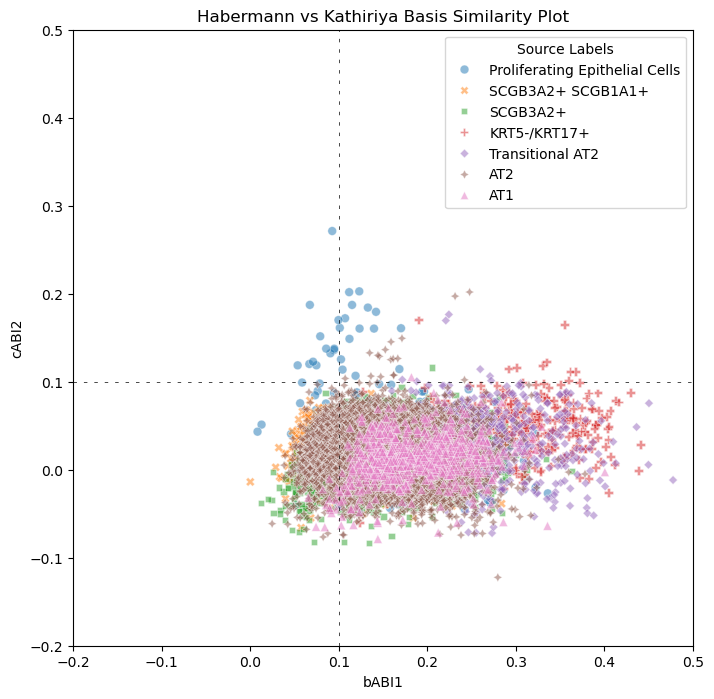

In [75]:
# Now plot exactly as before
axis1 = "bABI1"
axis2 = "cABI2"
includeCriteria = habermannObj.annotations.isin(habermannObj.toKeep)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
SimilarityHelper.plot_two(habermannObj.projections["Kathiriya"],
         axis1, axis2,
         ax=ax, annotations=habermannObj.annotations, includeCriteria=includeCriteria,
         similarityBounds = (-0.2, 0.5)
)

plt.title("Habermann vs Kathiriya Basis Similarity Plot")
# plt.savefig('/Your/Path/Here.png')
plt.show()

## Combine two bases

In [70]:
# LungMAP will be our primary dataset, and so we'll want to select specific labels from Kathiriya to add to it
humanBasis = SimilarityHelper.loadHumanBasis()
kathiriyaObj.combineBases(humanBasis, firstKeep=[axis1, axis2], combinedBasisName="LungMAP_Kathiriya")
# Project source onto the combined basis
habermannObj.projectOntoBasis(kathiriyaObj.combinedBases["LungMAP_Kathiriya"], "LungMAP_Kathiriya") # Construct projections

Loaded basis!
Combining bases...
CategoricalIndex(['bABI1', 'cABI2'], categories=['fCiliated', 'eClub', 'dBasal', 'cABI2', 'bABI1', 'aAEC2s'], ordered=False, dtype='category', name='celltypes')
Index(['Alveolar type 2', 'Ciliated', 'Basal', 'Alveolar type 1', 'Secretory',
       'Goblet'],
      dtype='object')
Projecting onto basis...
Finished projecting!


index,F00431_AGAGCTTGTAGAGGAA,F01380_GATCTAGTCTTGCCGT,F01391_AGTCTTTAGGTTACCT,F01391_ATCCACCAGGAGTCTG,F01391_CTCGTCATCATCTGCC,F01391_CTGATAGCAGACGCCT,F01391_CTGGTCTCACAGAGGT,F01391_GAACATCAGCTGATAA,F01391_TACTCATCATAGAAAC,F01391_TCAGGATTCGGTGTTA,...,ILD62-2_TGACTTTCATGGTCAT,ILD62-2_TGAGAGGCATCGATGT,ILD62-2_TGATTTCGTCCGTCAG,ILD62-2_TGCGCAGCAAGGTTTC,ILD62-2_TGTGGTACAGCGTAAG,ILD62-2_TTCTACACAACACCCG,ILD62-2_TTGACTTAGTATCTCG,ILD62-2_TTGGCAAAGCGTAATA,ILD62-2_TTGGCAATCGTAGATC,ILD62-2_TTTGCGCTCCTCCTAG
bABI1,0.047589,0.075743,0.107487,0.042186,0.060419,0.102527,0.048035,0.074917,0.051333,0.044122,...,0.055940,0.053984,0.093760,0.060342,0.049337,0.083375,0.056659,0.113452,0.073638,0.081620
cABI2,-0.022138,-0.030932,-0.050174,-0.037774,-0.034426,-0.070739,-0.046464,-0.036884,-0.046747,-0.045457,...,-0.030103,-0.021310,-0.043786,-0.024698,-0.031919,-0.033570,-0.018069,-0.047013,-0.027197,-0.037076
Alveolar type 2,0.040332,0.034829,0.066994,0.056091,0.055463,0.027235,0.042643,0.076737,0.060635,0.068616,...,0.028086,0.006717,0.026101,0.072978,0.005970,0.004097,0.041500,0.036491,0.059569,0.071896
Ciliated,-0.026810,-0.066710,-0.000421,-0.054470,-0.027288,-0.044668,-0.064504,-0.060775,-0.028482,-0.050059,...,-0.041834,-0.029146,-0.053242,-0.033691,-0.043452,-0.049952,-0.036240,-0.055314,-0.047765,-0.050839
Basal,-0.038462,0.043750,0.158604,0.002412,0.074393,-0.019767,0.088474,-0.011072,-0.006793,0.044312,...,0.018956,0.010154,0.056773,0.041691,0.041177,0.028010,0.028612,0.049147,0.020064,0.052841
Alveolar type 1,0.039130,-0.063730,-0.073943,-0.056627,-0.050786,-0.044644,-0.061737,-0.097455,-0.066299,-0.081779,...,0.170895,0.169152,0.186953,0.100738,0.145657,0.243475,0.203535,0.165204,0.191823,0.162696
Secretory,0.234384,0.267124,0.288098,0.275195,0.213846,0.304505,0.284284,0.314668,0.233080,0.295103,...,0.026130,0.028119,0.073797,0.058176,0.054600,0.048296,0.048264,0.078136,0.074187,0.077828
Goblet,0.220264,0.188778,0.174248,0.325536,0.224320,0.412047,0.240226,0.280709,0.313217,0.211342,...,0.003759,-0.000520,-0.018686,-0.021232,-0.013326,-0.019892,-0.009487,-0.011428,-0.017201,-0.024008


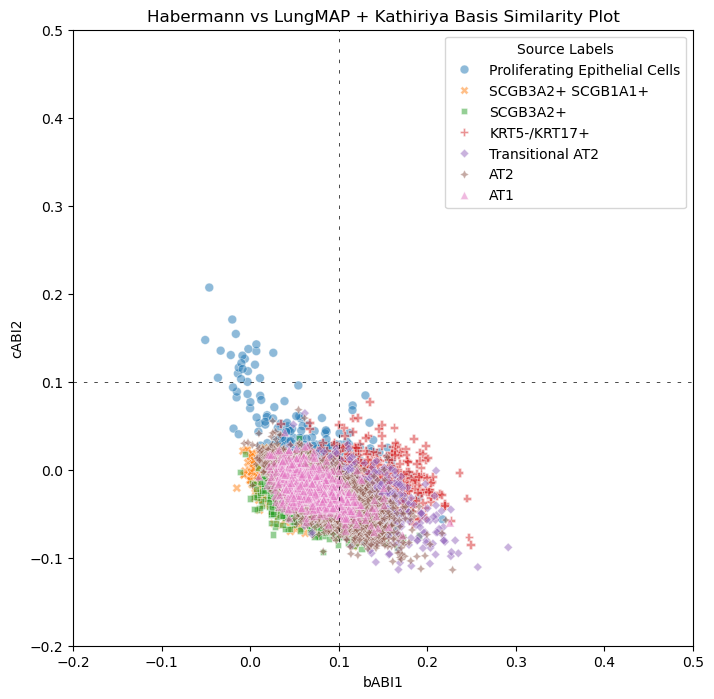

In [76]:
# Now plot against the same axes, but with the hopefully more informed background information provided by LungMAP (axes can be in any combination from the bases)
fig, ax = plt.subplots(1, 1, figsize=(8,8))
SimilarityHelper.plot_two(habermannObj.projections["LungMAP_Kathiriya"], # Only change is to the identity of the projection
         axis1, axis2,
         ax=ax, annotations=habermannObj.annotations, includeCriteria=includeCriteria,
         similarityBounds = (-0.2, 0.5)

)
plt.title("Habermann vs LungMAP + Kathiriya Basis Similarity Plot")
# plt.savefig('/Your/Path/Here.png')
plt.show()